### Problem Statement

The retail company aims to analyze customer purchase behavior, specifically focusing on purchase amounts across different product categories. They've provided a purchase summary of selected high-volume products from the previous month, along with customer demographics such as age, gender, marital status, city type, and length of stay in the current city. Additionally, the dataset includes product details like product ID and category, as well as the total purchase amount from the last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

### Importing Libraries and Loading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

### Loading the dataset

In [2]:
bfs=pd.read_csv(r'C:\Users\rushi\Machine learning Projects\BlackFridaySales.csv')

In [3]:
bfs.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Dataset Definition

### Understanding the features and dimensions of the dataset

In [4]:
bfs.shape

(550068, 12)

In [5]:
# Features data-type
bfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Age should be treated as a numerical column

City_Category we can convert this to a numerical column and should look at the frequency of each city category.

Gender has two values and should be converted to binary values

Product_Category_2 and Product_Category_3 have null values

In [6]:
bfs.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
bfs['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [8]:
# Checking the counts of unique values
round((bfs['Age'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

26-35    39.92 %
36-45     20.0 %
18-25    18.12 %
46-50     8.31 %
51-55      7.0 %
55+       3.91 %
0-17      2.75 %
Name: Age, dtype: object

In [9]:
# Checking the counts of unique values
round((bfs['Stay_In_Current_City_Years'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

1     35.24 %
2     18.51 %
3     17.32 %
4+     15.4 %
0     13.53 %
Name: Stay_In_Current_City_Years, dtype: object

In [10]:
bfs.duplicated().sum()

0

### Checking Null values

In [11]:
bfs.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

### Null Value in percentage

In [12]:
bfs.isnull().sum()/bfs.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

There are 31% null values in the Product_Category_2 and 69% null values in the Product_Category_3

### Unique elements in each attributes

In [13]:
bfs.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

We can drop User_ID and Product_ID for model prediction as it has more unique values.

### Exploratory Data Analysis

Target Variable Purchase

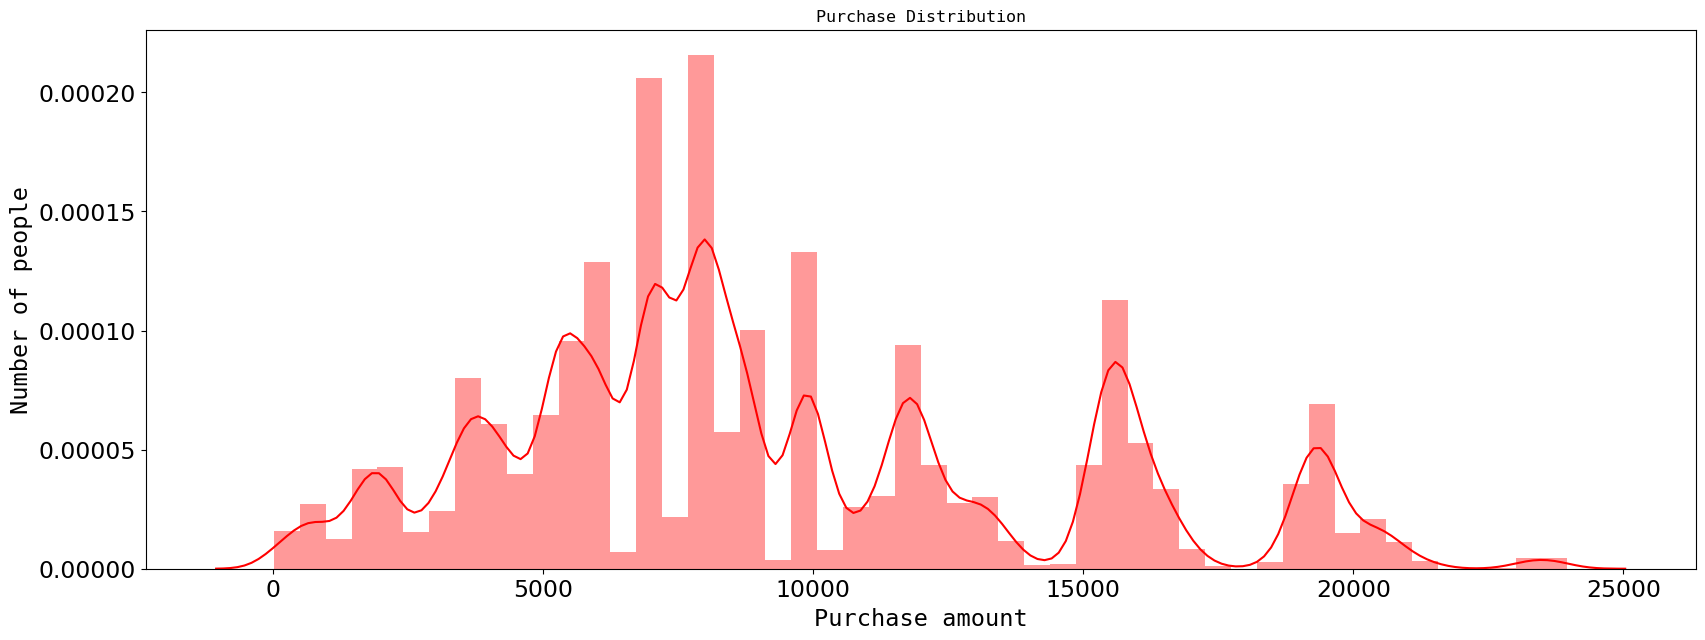

In [14]:
plt.figure(figsize = (20, 7))
sns.distplot(bfs["Purchase"],color='r')
plt.title('Distribution of Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 17, 'fontweight' : 'bold'})
plt.xlabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 17})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 17})
plt.tick_params(labelsize = 17)
plt.title("Purchase Distribution")
plt.show()

We can observe that purchase amount is repeating for many customers.This may be because on Black Friday Sales many are buying discounted products in large numbers and kind of follows a normal distribution.

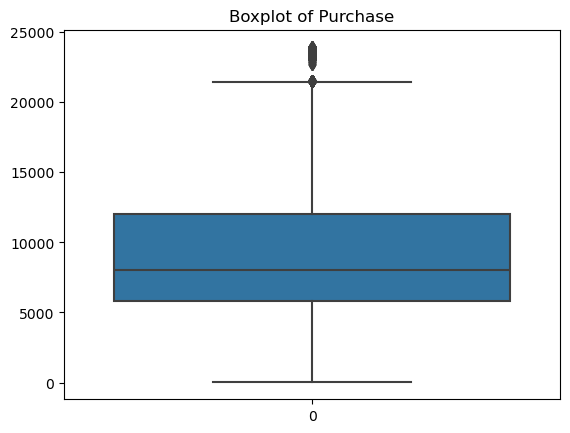

In [15]:
sns.boxplot(bfs["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

As we see in the boxplot of purchase we can observe that purchase columns have some outliters

In [16]:
bfs['Purchase'].skew()

0.6001400037087128

In [17]:
bfs["Purchase"].kurtosis()+3

2.66162243441483

In [18]:
# Statistical summary
bfs['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

The purchase is right skewed and we can observe multiple peaks in the distribution we can do a log transformation for the purchase.

### Gender

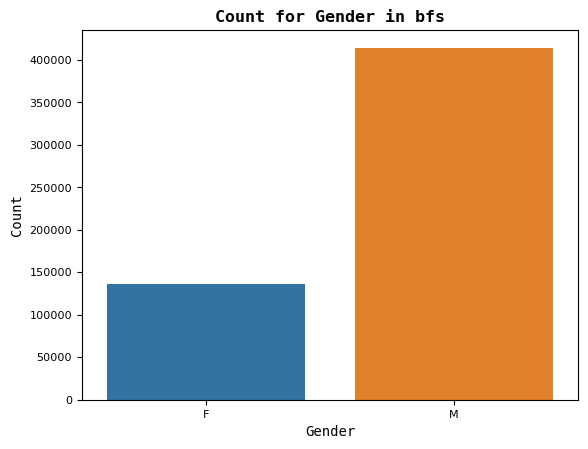

In [19]:
sns.countplot (x='Gender', data = bfs)
plt.title('Count for Gender in bfs', fontdict = {'fontname' : 'Monospace', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Count', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 8)
plt.show()

In [20]:
bfs['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

There are more males than females this also see in the bar plot

In [21]:
bfs.groupby("Gender").mean()["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase.

### Marital Status

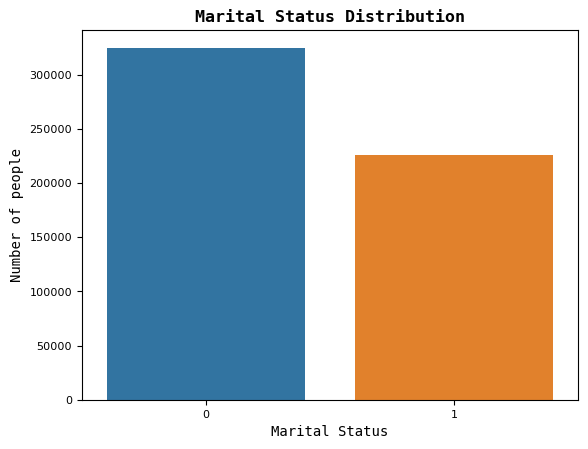

In [22]:
count = bfs['Marital_Status'].value_counts()
sns.countplot (x='Marital_Status', data = bfs)
plt.title('Marital Status Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 12, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 8)
plt.show()

0 = unmarried people , 1 = married people


There are more unmarried people in the dataset who purchase more

In [23]:
bfs['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

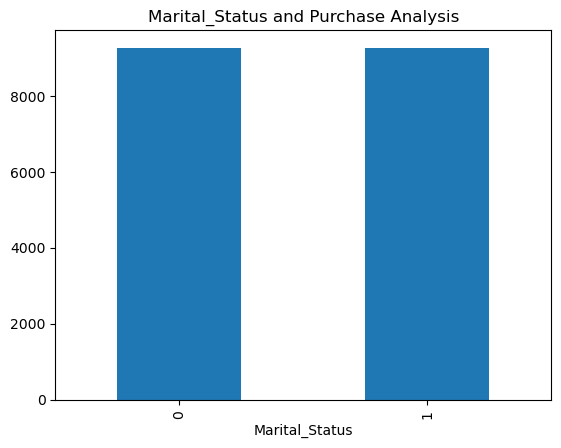

In [24]:
bfs.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

This is interesting though unmarried people spend more on purchasing, the average purchase amount of married and unmarried people are the same.

### Occupation

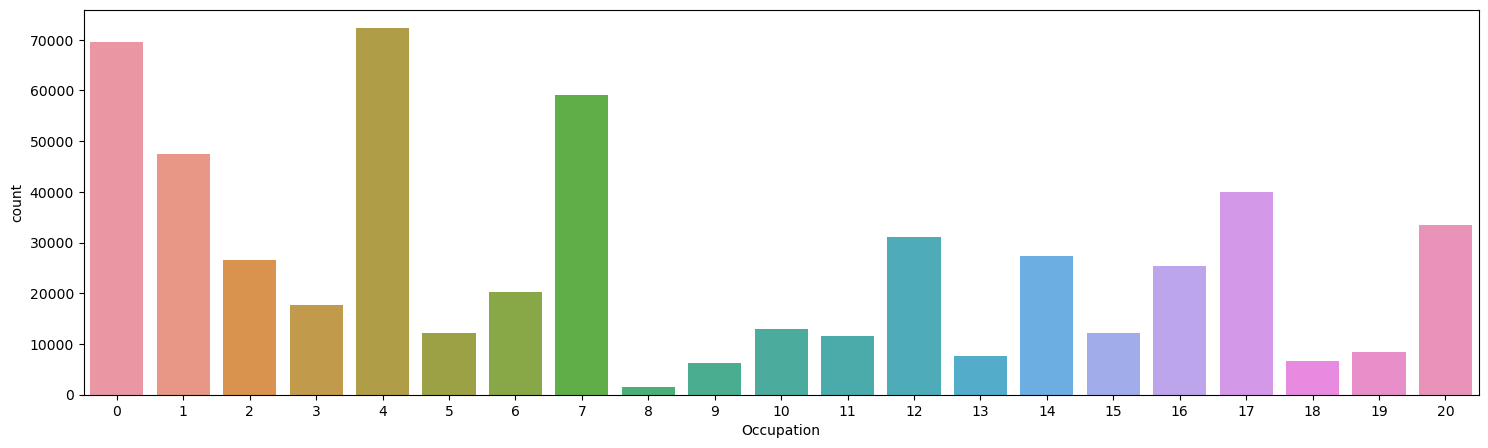

In [25]:
plt.figure(figsize=(18,5))
sns.countplot (x='Occupation' , data = bfs )
plt.show()

Occupation has at least 20 different values. Since we do not known to each occupation each number corresponds, is difficult to make any analysis. Furthermore, it seems we have no alternative but to use since there is no way to reduce this number

In [26]:
occup = pd.DataFrame(bfs.groupby("Occupation").mean()["Purchase"])
occup

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


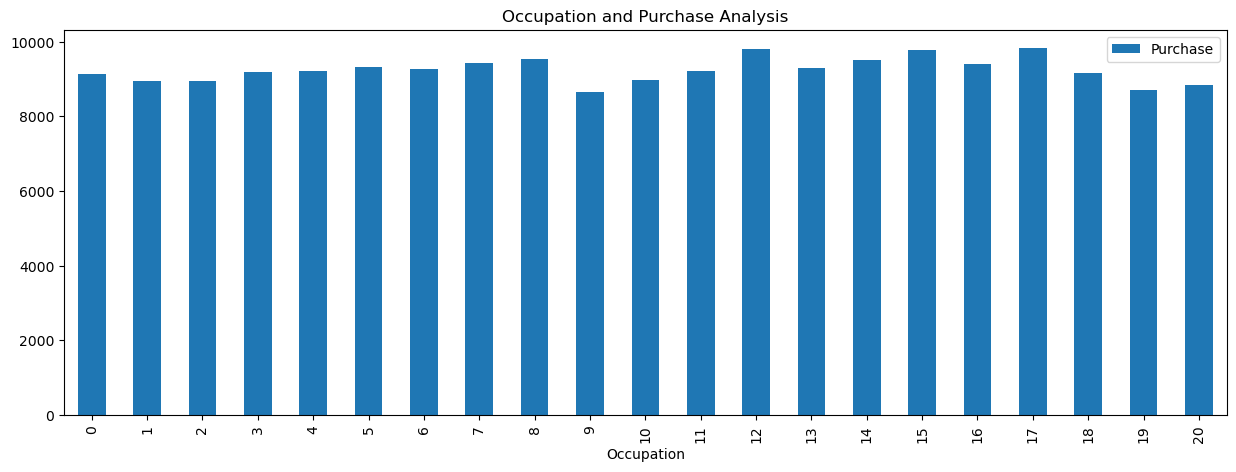

In [27]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

### City_Category

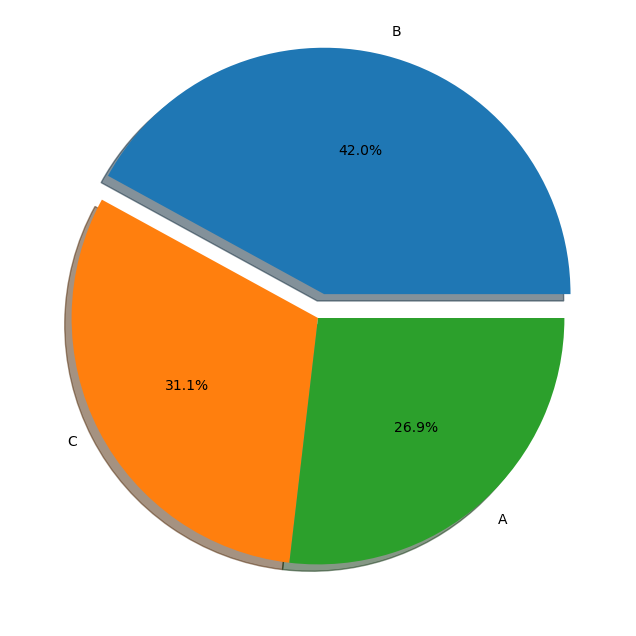

In [28]:
plt.figure(figsize=(12,8))
values = bfs['City_Category'].value_counts().values
labels = bfs['City_Category'].value_counts().keys()
explode = (0.1,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%');

It is observed that city category B has made the most number of puchases.

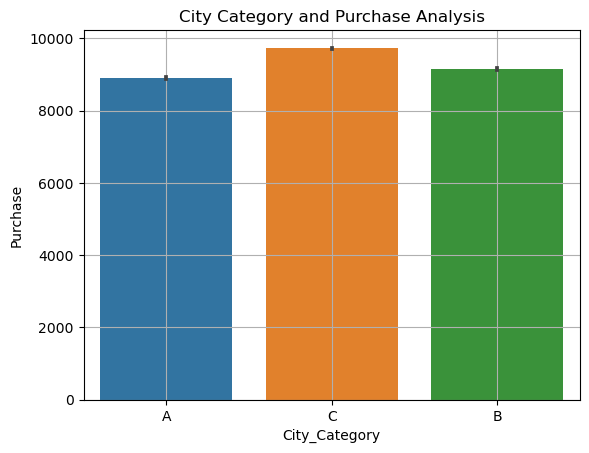

In [29]:
sns.barplot (x="City_Category" , y = "Purchase" , data = bfs )
plt.title("City Category and Purchase Analysis")
plt.grid()

However, the city whose buyers spend the most is city type ‘C’.

### Stay_In_Current_City_Years

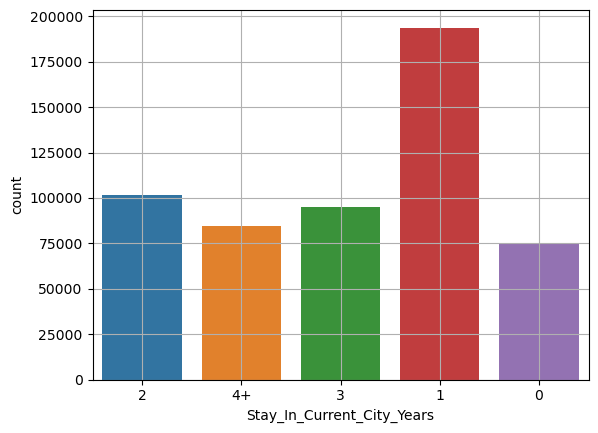

In [30]:
sns.countplot (x="Stay_In_Current_City_Years" , data = bfs )
plt.grid()

It looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

### Age

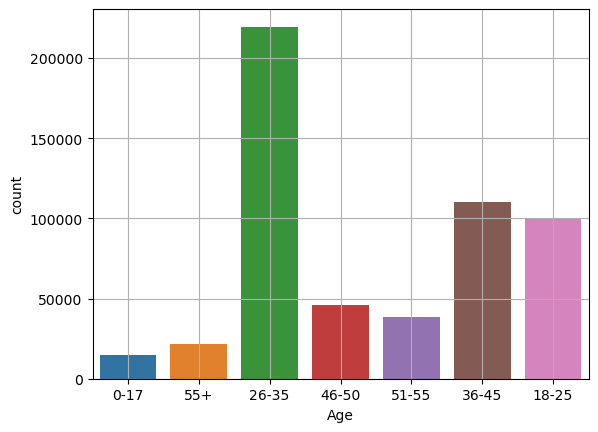

In [31]:
sns.countplot (x="Age" , data = bfs )
plt.grid()

Based on the count plot the observations noted are the age group 26-35 has a maximum count. The second maximum count observed is for the age group 36-45. The third maximum count observed is for the age group 18-25.

<Axes: xlabel='Age'>

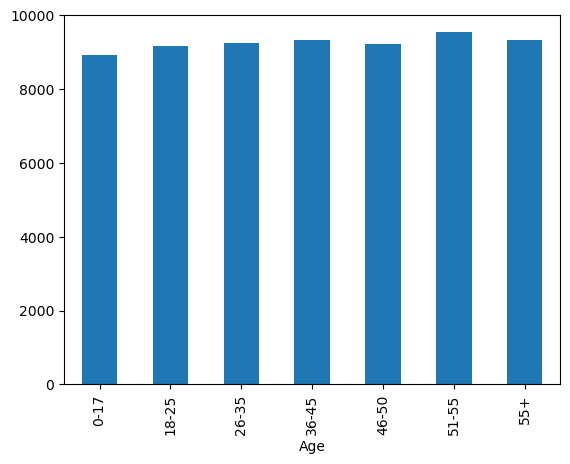

In [32]:
bfs.groupby("Age").mean()["Purchase"].plot(kind='bar')

Mean puchase rate between the age groups tends to be the same except that the 51-55 age group has a little higher average purchase amount

### Product_Category_1

<Axes: xlabel='Product_Category_1', ylabel='count'>

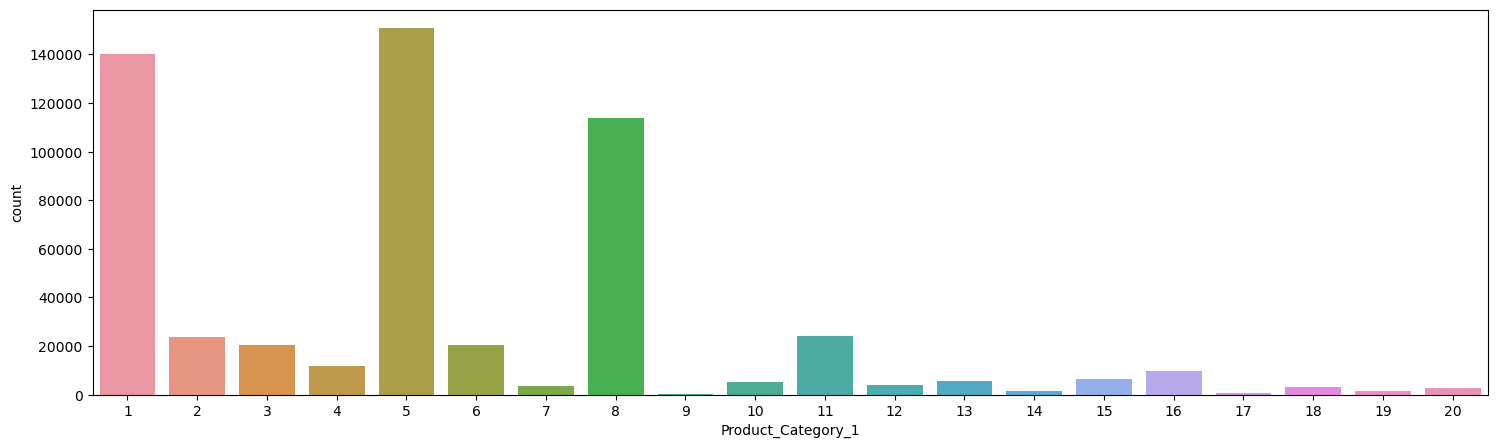

In [33]:
plt.figure(figsize=(18,5))
sns.countplot(x='Product_Category_1',data=bfs)

It is clear that `Product_Category_1` numbers 1,5 and 8 stand out. Unfortunately we don't know which product each number represents as it is masked.

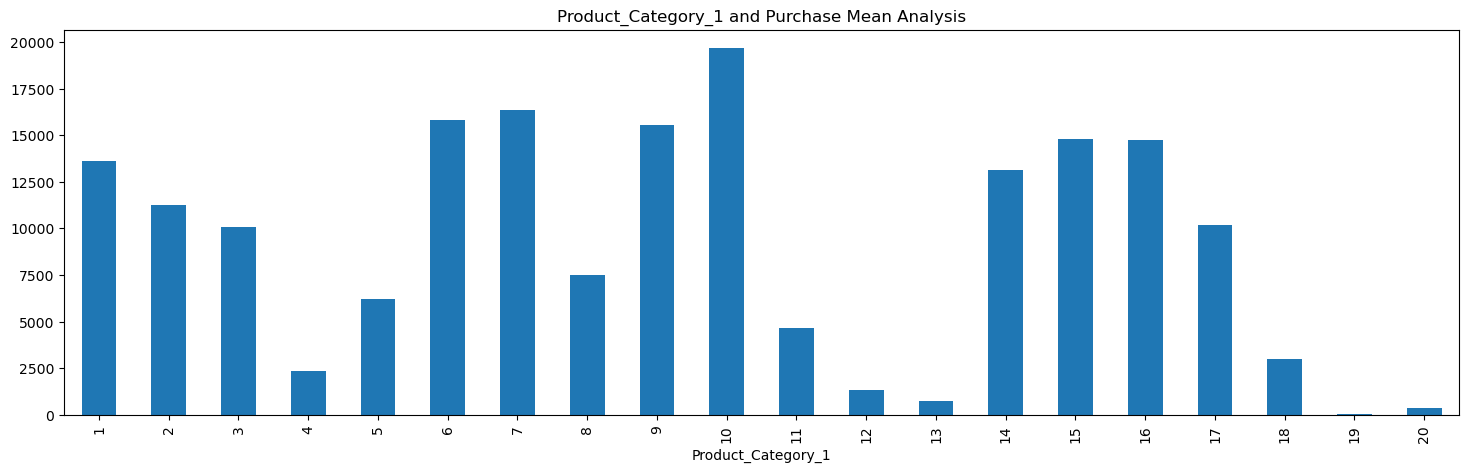

In [34]:
bfs.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

If you see the value spent on average for Product_Category_1 you see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

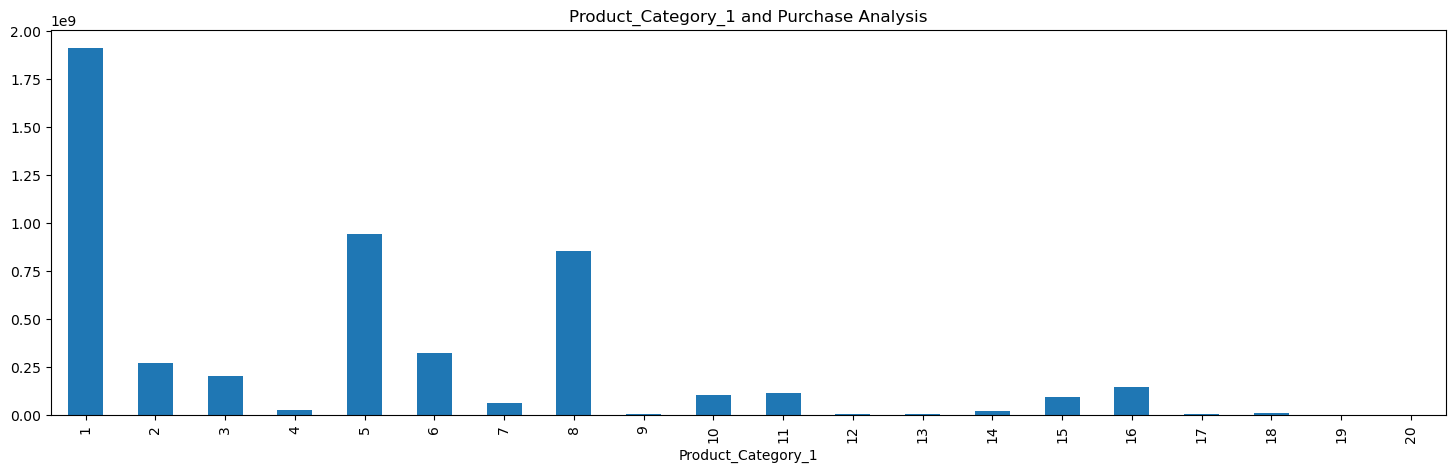

In [35]:
bfs.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

The distribution that we saw for this predictor previously appears here. For example, those three products have the highest sum of sales since their were three most sold products.

From the correlation, we can observe that the dependent feature 'Purchase' is highly correlated with 'Product_Category_1' and 'Product_Category_2'.

In [36]:
bfs.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


From the correlation, we can observe that the dependent feature 'Purchase' is highly correlated with 'Product_Category_1' and 'Product_Category_2'.

And Also attributes age and marital_status

In [37]:
#sns.pairplot(bfs.sample(20000),palette='winter');

### Feature Engineering

#### Missing Values Imputation

In [38]:
bfs.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

If we fill the null is irrelevant so Product_Category_3 there is higher number of null so we drop the column 

In [39]:
bfs=bfs.drop(['Product_Category_3'],axis=1)

In [40]:
bfs.Product_Category_2 .fillna(bfs.Product_Category_2 .median() , inplace = True)

In [41]:
bfs.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,1422


### Treatment of Outliers

In [42]:
def remove_outliers_boxplot_reverse(df,col):   
    q3 = np.quantile(df[col], .75)
    q1 = np.quantile(df[col], .25)
    iqr  =  q3 - q1
    global outlier_free_list
    global  outlier_free_df
    print("iqr is .." , iqr)    
    global outlier_free_df
    outlier_free_list = [x for x in df[col] if ((x < (q3 + 1.5*iqr)) & (x > (q1 - 1.5*iqr)))]
    outlier_free_df = df.loc[df[col].isin(outlier_free_list)] ; print(outlier_free_df.shape)
    print('Number of outliers removed -->', df.shape[0] - outlier_free_df.shape[0])

In [43]:
remove_outliers_boxplot_reverse(bfs,'Purchase')

iqr is .. 6231.0
(547391, 11)
Number of outliers removed --> 2677


In [44]:
remove_outliers_boxplot_reverse(bfs,'Product_Category_1')

iqr is .. 7.0
(545915, 11)
Number of outliers removed --> 4153


In [45]:
outlier_free_df.shape

(545915, 11)

In [46]:
bfs1=outlier_free_df

In [47]:
outlier_free_df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,7969


### Dropping the irrelevant columns

In [48]:
bfs1 = bfs1.drop(["User_ID","Product_ID"],axis=1)

### Feature Encoding

In [49]:
bfs1.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,9.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,9.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,9.0,7969


In [50]:
bfs1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545915 entries, 0 to 545914
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      545915 non-null  object 
 1   Age                         545915 non-null  object 
 2   Occupation                  545915 non-null  int64  
 3   City_Category               545915 non-null  object 
 4   Stay_In_Current_City_Years  545915 non-null  object 
 5   Marital_Status              545915 non-null  int64  
 6   Product_Category_1          545915 non-null  int64  
 7   Product_Category_2          545915 non-null  float64
 8   Purchase                    545915 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 41.7+ MB


In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
bfs.Age.replace({'0-17':0, '18-25':1 ,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6}, inplace=True)

In [53]:
bfs.Stay_In_Current_City_Years.replace({'4+':4},inplace=True)

In [54]:
bfs.Stay_In_Current_City_Years=bfs.Stay_In_Current_City_Years.astype('int64')

In [55]:
le=LabelEncoder()

In [56]:
bfs1.select_dtypes(include=['object']).columns

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')

In [57]:
bfs1[bfs1.select_dtypes(include=['object']).columns]=bfs1[bfs1.select_dtypes(include=['object']).columns].apply(le.fit_transform)

### Separating train into X and Y

In [58]:
x = bfs1.drop('Purchase',axis=1)
y = bfs1.Purchase

# Feature Selection

In [59]:
from scipy.stats import chi2_contingency

In [60]:
pvalues=[]

for col in x.columns:
    tab1=pd.crosstab(x[col],y)
    pvalues.append(chi2_contingency(tab1)[1])

In [61]:
chi_df=pd.DataFrame()

In [62]:
chi_df['feature']=x.columns
chi_df['Pvalues']=pvalues

In [63]:
chi_df = chi_df.sort_values('Pvalues',ascending=False)

In [64]:
chi_df[chi_df.Pvalues<=.05]

,feature,Pvalues
2,Occupation,9.079240e-44
3,City_Category,7.294636e-52
1,Age,7.891311e-85
0,Gender,9.827016e-161
6,Product_Category_1,0.000000e+00
7,Product_Category_2,0.000000e+00


### RFE

In [65]:
from sklearn.feature_selection import RFE

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
dt = DecisionTreeRegressor()
rfe = RFE(dt,n_features_to_select = 4)
rfe.fit(x,y)

RFE(estimator=DecisionTreeRegressor(), n_features_to_select=4)

In [68]:
rfe.support_

array([False, False,  True, False,  True, False,  True,  True])

In [69]:
df1 = pd.DataFrame()
df1['features']=x.columns
df1['support']=rfe.support_

In [70]:
df1.sort_values('support',ascending=False)

,features,support
2,Occupation,True
4,Stay_In_Current_City_Years,True
6,Product_Category_1,True
7,Product_Category_2,True
0,Gender,False
1,Age,False
3,City_Category,False
5,Marital_Status,False


In [71]:
selected_features = rfe.get_feature_names_out()
selected_features

array(['Occupation', 'Stay_In_Current_City_Years', 'Product_Category_1',
       'Product_Category_2'], dtype=object)

In [72]:
l1=list(selected_features)

In [73]:
l1.append('Purchase')

In [74]:
l1

['Occupation',
 'Stay_In_Current_City_Years',
 'Product_Category_1',
 'Product_Category_2',
 'Purchase']

In [75]:
bfs1.shape

(545915, 9)

In [76]:
bfs1=bfs1.loc[:,l1]

In [77]:
bfs1.shape

(545915, 5)

In [78]:
import statsmodels.api as sm
results = sm.OLS(y, x).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               Purchase   R-squared (uncentered):                   0.740
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                          1.938e+05
Date:                Tue, 19 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:00:26   Log-Likelihood:                     -5.4661e+06
No. Observations:              545915   AIC:                                  1.093e+07
Df Residuals:                  545907   BIC:                                  1.093e+07
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

### Splitting data into Test Train Split

In [79]:
from sklearn.model_selection import train_test_split
bfs1_train,bfs1_test=train_test_split(bfs1,test_size=.2)

In [80]:
bfs1_train_x=bfs1_train.iloc[:,0:-1]
bfs1_train_y=bfs1_train.iloc[:,-1]

In [81]:
bfs1_test_x=bfs1_test.iloc[:,0:-1]
bfs1_test_y=bfs1_test.iloc[:,-1]

In [82]:
bfs1_train_x.shape

(436732, 4)

In [83]:
bfs1_test_x.shape

(109183, 4)

### Model building

Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lr = LinearRegression()
lr.fit(bfs1_train_x , bfs1_train_y)

LinearRegression()

In [86]:
Rsquare=lr.score(bfs1_train_x , bfs1_train_y)
Rsquare

0.10205151720610217

In [87]:
N = bfs1_train_x.shape[0]
K = bfs1_train_x.shape[1]

Adj_Rsqaure = 1-(1-Rsquare)*(N-1)/(N-K-1)
Adj_Rsqaure

0.10204329286015801

In [88]:
lr.intercept_

11891.479592333966

In [89]:
lr.coef_

array([  14.70433728,   12.34011272, -391.19432269,  -65.81901604])

In [90]:
pred_train=lr.predict(bfs1_train_x)

In [91]:
err_train = bfs1_train_y-pred_train

In [92]:
import numpy as np

In [93]:
np.mean(err_train)

1.841888581395648e-13

<Axes: xlabel='Purchase', ylabel='Count'>

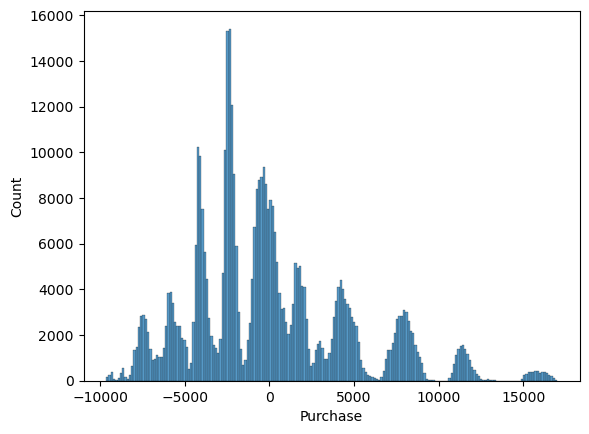

In [94]:
sns.histplot(err_train)

In [95]:
err_train.skew()

0.8477039875288513

In [96]:
err_train.kurtosis()+3

3.6951341973334904

In [97]:
actual_pred=pd.DataFrame()
actual_pred ['Actual']=bfs1_train_y
actual_pred ['Pred']=pred_train

In [98]:
actual_pred

,Actual,Pred
316943,4201,8387.754701
219513,8611,9548.906550
212363,8053,8284.824340
535994,18985,10452.519459
327762,10015,8446.572050
...,...,...
281446,16616,5093.433639
94516,15462,11569.779510
452861,11755,10540.044479
305320,7939,8431.867713


<Axes: xlabel='Actual', ylabel='Pred'>

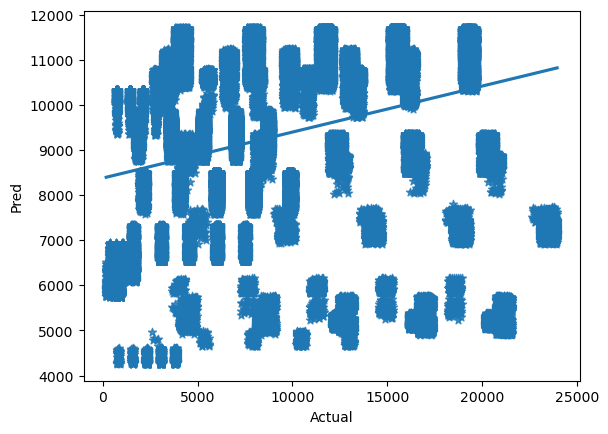

In [99]:
sns.regplot(x='Actual',y='Pred',data=actual_pred , marker='*')

In [100]:
pred_test = lr.predict(bfs1_test_x)
err_test= bfs1_test_y - pred_test

In [101]:
from sklearn.metrics import mean_squared_error , mean_absolute_percentage_error , r2_score ,mean_absolute_error

In [102]:
mse_test = np.mean(np.square(err_test))
mse_test

22440598.491087206

In [103]:
mape_test_lr=np.mean(np.abs(err_test*100/bfs1_test_y))
mape_test_lr

69.16764216404847

In [104]:
rmse_test = np.sqrt(mean_squared_error(bfs1_test_y,pred_test))
rmse_test

4737.150883293355

In [105]:
r2_score(bfs1_test_y,pred_test)*100

10.090399397703898

In [106]:
acc = 100 - mape_test_lr
acc

30.832357835951527

### DecisionTreeRegressor

In [107]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0) 
dt.fit(bfs1_train_x , bfs1_train_y)

DecisionTreeRegressor(random_state=0)

In [108]:
pred_dt = dt.predict(bfs1_test_x)

In [109]:
err_test_dt=bfs1_test_y - pred_dt

In [110]:
mse_test_dt = np.mean(np.square(err_test_dt))
mse_test_dt

9169060.260610353

In [111]:
mape_test_dt=np.mean(np.abs(err_test_dt*100/bfs1_test_y))
mape_test_dt

34.67529542947648

In [112]:
rmse_test = np.sqrt(mean_squared_error(bfs1_test_y,pred_dt))
rmse_test

3028.045617326504

In [113]:
r2_score(bfs1_test_y,pred_dt)*100

63.26361142920125

In [114]:
acc = 100 - mape_test_dt
acc

65.32470457052352

### Random Forest Regressor

In [115]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=0)
rf.fit(bfs1_train_x,bfs1_train_y)

RandomForestRegressor(random_state=0)

In [116]:
pred_rf=rf.predict(bfs1_test_x)

In [117]:
err_test_rf=bfs1_test_y - pred_rf

In [118]:
mse_test_rf = np.mean(np.square(err_test_rf))
mse_test_rf

9133889.206998456

In [119]:
mape_test_rf=np.mean(np.abs(err_test_rf*100/bfs1_test_y))
mape_test_rf

34.64765711135552

In [120]:
rmse_test = np.sqrt(mean_squared_error(bfs1_test_y,pred_rf))
rmse_test

3022.232487251521

In [121]:
r2_score(bfs1_test_y,pred_rf)*100

63.404526359979464

In [122]:
acc = 100 - mape_test_rf
acc

65.35234288864447

### XGBoost Regressor

In [123]:
from xgboost import XGBRegressor
xg=XGBRegressor(random_state=0)
xg.fit(bfs1_train_x , bfs1_train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [124]:
pred_xg = xg.predict(bfs1_test_x)

In [125]:
err_test_xg=bfs1_test_y - pred_xg 

In [126]:
mse_xg=np.mean(np.square(err_test_xg))
mse_xg

9020872.754287058

In [127]:
mape_test_xg=np.mean(np.abs(err_test_xg*100/bfs1_test_y))
mape_test_xg

34.6594133536479

In [128]:
rmse_test = np.sqrt(mean_squared_error(bfs1_test_y,pred_xg))
rmse_test

3003.4767777171137

In [129]:
r2_score(bfs1_test_y,pred_xg)*100

63.857333540184946

In [130]:
acc = 100 - mape_test_xg
acc

65.34058664635211

### Gradient boosting regressor

In [131]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(bfs1_train_x , bfs1_train_y)

GradientBoostingRegressor(random_state=42)

In [132]:
pred_gbr=gbr.predict(bfs1_test_x)

In [133]:
err_test_gbr=bfs1_test_y - pred_gbr 

In [134]:
mse_gbr=np.mean(np.square(err_test_gbr))
mse_gbr

9149726.894055415

In [135]:
mape_test_gbr=np.mean(np.abs(err_test_gbr*100/bfs1_test_y))
mape_test_gbr

35.38092310595372

In [136]:
rmse_test = np.sqrt(mean_squared_error(bfs1_test_y,pred_gbr))
rmse_test

3024.8515490938466

In [137]:
r2_score(bfs1_test_y,pred_gbr)*100

63.3410717191276

In [138]:
acc = 100 - mape_test_gbr
acc

64.61907689404629

### Model Evaluation

In [139]:
print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(bfs1_test_y,pred_test)))
print("R2 score:", r2_score(bfs1_test_y,pred_test)*100)

Linear Regression: 
RMSE: 4737.150883293355
R2 score: 10.090399397703898


In [140]:
print("DecisionTreeRegressor: ")
print("RMSE:",np.sqrt(mean_squared_error(bfs1_test_y,pred_dt)))
print("R2 score:", r2_score(bfs1_test_y,pred_dt)*100)

DecisionTreeRegressor: 
RMSE: 3028.045617326504
R2 score: 63.26361142920125


In [141]:
print("Random Forest Regressor: ")
print("RMSE:",np.sqrt(mean_squared_error(bfs1_test_y,pred_rf)))
print("R2 score:", r2_score(bfs1_test_y,pred_rf)*100)

Random Forest Regressor: 
RMSE: 3022.232487251521
R2 score: 63.404526359979464


In [142]:
print("XGBoost Regressor: ")
print("RMSE:",np.sqrt(mean_squared_error(bfs1_test_y,pred_xg)))
print("R2 score:", r2_score(bfs1_test_y,pred_xg)*100)

XGBoost Regressor: 
RMSE: 3003.4767777171137
R2 score: 63.857333540184946


In [143]:
print("Gradient boosting regressor: ")
print("RMSE:",np.sqrt(mean_squared_error(bfs1_test_y,pred_gbr)))
print("R2 score:", r2_score(bfs1_test_y,pred_gbr)*100)

Gradient boosting regressor: 
RMSE: 3024.8515490938466
R2 score: 63.3410717191276


### Hyperparameter tuning

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]}

In [146]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]}

In [147]:
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(bfs1_train_x, bfs1_train_y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [148]:
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)
print("Best parameters:", best_params)
print("Best RMSE:", best_score)

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
Best RMSE: 2994.102901331775


In [149]:
best_model = grid_search.best_estimator_

In [150]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [151]:
predictions = best_model.predict(bfs1_test_x)

In [152]:
predictions

array([ 1649.7853,  6525.9355, 12796.542 , ..., 13601.41  ,  7635.604 ,
        7658.5874], dtype=float32)

In [153]:
err_test_GridSearch=bfs1_test_y - predictions

In [154]:
mse_gbr=np.mean(np.square(err_test_GridSearch))
mse_gbr

9012908.719646778

In [155]:
mape_test_gbr=np.mean(np.abs(err_test_GridSearch*100/bfs1_test_y))
mape_test_gbr

34.71397280431826

In [156]:
r2_score(bfs1_test_y,predictions)*100

63.889241921506944

In [158]:
acc = 100 - mape_test_gbr
acc

65.28602719568174

In [159]:
print("XG boost regressor after Hyperparameter tuning: ")
print("RMSE:",( best_score))
print("R2 score:", r2_score(bfs1_test_y,predictions)*100)

XG boost regressor after Hyperparameter tuning: 
RMSE: 2994.102901331775
R2 score: 63.889241921506944


## Conclusion:

1.In this project, we tried to build a model using various algorithms such as Linear regression, KNN regression, Decision tree regression, Random forest , Gradient boosting regressor and XGB regressor to get the best possible prediction.

2.The ML algorithm that perform the best was XGBoost Regressor Model with RMSE = 2998 & R2 Score = 63

3.Thus the proposed model will predict the customer purchase on Black Friday and give the retailer insight into customer choice of products. This will result in a discount based on customer-centric choices thus increasing the profit to the retailer as well as the customer.

# Finished 

Model Export

In [161]:
import pickle

In [162]:
pickle.dump(best_model, open(r"C:\Users\rushi\Machine learning Projects\Cloud\build.pkl",'wb'))  #model = dt # Exporting model from python to laptop